In [3]:
import pandas as pd
df = pd.read_csv('../z20_data/chipotle.tsv', sep='\t')
df.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [5]:
df.shape

(4622, 5)

In [6]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [8]:
df.describe()

,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [15]:
df.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [30]:
# item_name당 주문개수 출력하시오.
df.groupby('item_name')['quantity'].sum().head()

item_name
6 Pack Soft Drink        55
Barbacoa Bowl            66
Barbacoa Burrito         91
Barbacoa Crispy Tacos    12
Barbacoa Salad Bowl      10
Name: quantity, dtype: int64

<BarContainer object of 5 artists>

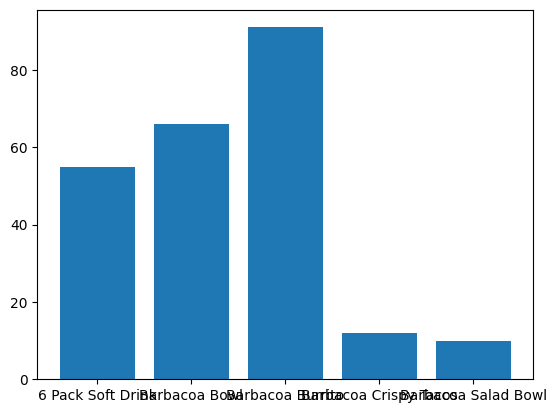

In [31]:
# 막대그래프
x_group = df.groupby('item_name')['quantity'].sum().head().index
y_group = df.groupby('item_name')['quantity'].sum().head().values

import matplotlib.pyplot as plt
plt.bar(x_group,y_group)

In [10]:
df['order_id'] = df['order_id'].astype(str)

In [14]:
# 주문당 평균 계산금액 출력하시오.
df['item_price'] = df['item_price'].str.replace("$","").astype(float)

In [23]:
df.groupby('order_id')['item_price'].sum().mean()

18.811428571428568

In [24]:
# 한 주문에 10달러 이상 사용한 주문 번호를 출력하시오.
count = df.groupby('order_id').sum()
count[count['item_price']>=10].sort_values('item_price',ascending=False).head()


,quantity,item_name,choice_description,item_price
order_id,,,,
926,23,Steak BurritoChicken BowlChicken BowlChicken B...,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuc...",205.25
1443,35,Chips and Fresh Tomato SalsaBottled Water6 Pac...,"[Coke][Fresh Tomato Salsa, [Fajita Vegetables,...",160.74
1483,14,Chicken BowlSteak BowlChicken BurritoSteak Bow...,"[Roasted Chili Corn Salsa, [Rice, Black Beans,...",139.00
691,11,Chicken BurritoChicken Salad BowlSteak Burrito...,"[Tomatillo Red Chili Salsa, [Rice, Cheese, Sou...",118.25
1786,20,Chicken BowlCarnitas BurritoChicken BowlChicke...,"[Fresh Tomato Salsa, Rice][Fresh Tomato Salsa,...",114.30


In [36]:
# 각 아이템의 가격 구하시오.
## 주문 1개이면서 item_name 최저가격인 것을 출력하시오.
item = df[df['quantity'] == 1]
price = item.groupby('item_name').min().sort_values('item_price')
price['item_price']

item_name
Bottled Water                            1.09
Canned Soda                              1.09
Canned Soft Drink                        1.25
Side of Chips                            1.69
Chips                                    1.99
Chips and Fresh Tomato Salsa             2.29
Chips and Tomatillo-Red Chili Salsa      2.39
Chips and Tomatillo-Green Chili Salsa    2.39
Chips and Roasted Chili-Corn Salsa       2.39
Chips and Tomatillo Red Chili Salsa      2.95
Chips and Tomatillo Green Chili Salsa    2.95
Chips and Roasted Chili Corn Salsa       2.95
Chips and Mild Fresh Tomato Salsa        3.00
Nantucket Nectar                         3.39
Izze                                     3.39
Chips and Guacamole                      3.89
6 Pack Soft Drink                        6.49
Crispy Tacos                             7.40
Salad                                    7.40
Bowl                                     7.40
Burrito                                  7.40
Chicken Bowl            

In [44]:
## 가장 비싼 주문에서 item이 총 몇개 주문되었는지 출력하시오.
### 가장 높은 금액으로 주문한 주문번호,수량,금액을 출력하시오.
items = df.groupby('order_id').sum().sort_values('item_price',ascending=False)
items[['quantity','item_price']][:1]

,quantity,item_price
order_id,,
926,23,205.25


In [57]:
# Chicken Bowl를 한 주문에 2개 이상 주문한 횟수가 몇번인지 출력하시오.
bbq = (df['item_name'] == 'Chicken Bowl') & (df['quantity'] >= 2)
len(df[bbq])

# Chicken Bowl 총 매출액을 출력하시오.
chicken_sum = df[df['item_name'] == 'Chicken Bowl']['item_price'].sum()
all_sum = df['item_price'].sum()
# Chicken Bowl은 총매출액의 몇%가 되는지 출력하시오.
(chicken_sum/all_sum*100).astype(str)+"%"

'21.283176657731442%'